In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df=pd.read_csv('insuranceFraud.csv')


### Data Cleaning
1. Handling Missing values
2. Handling Missing values
3. Handling Duplicates
4. Check data type
5. Understand the dataset

In [2]:
import numpy as np
df=df.replace('?',np.nan)

In [3]:
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

collision_type 17.8 % missing values
authorities_contacted 9.1 % missing values
property_damage 36.0 % missing values
police_report_available 34.3 % missing values


In [4]:
from sklearn.impute import SimpleImputer

# Create an imputer object with a desired strategy
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to numerical features
df[['collision_type', 'authorities_contacted','property_damage','police_report_available']] = imputer.fit_transform(df[['collision_type', 'authorities_contacted','property_damage','police_report_available']])

In [6]:
cols_to_drop=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

In [7]:
# dropping the unnecessary columns
df.drop(columns=cols_to_drop,inplace=True)

In [8]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,8,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,Police,20,1,NO,0,1,NO,6500,1300,650,4550,N


In [9]:
df.shape

(1000, 27)

In [10]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 15


In [11]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 12


In [12]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 6


In [13]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 9


In [14]:
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

In [15]:
y.head()

0    Y
1    Y
2    N
3    Y
4    N
Name: fraud_reported, dtype: object

In [16]:
# If the target column has Y it is encoded as 1 others as 0
y= np.where(y=='Y', 1,0)

In [17]:
df.columns

Index(['months_as_customer', 'age', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'fraud_reported'],
      dtype='object')

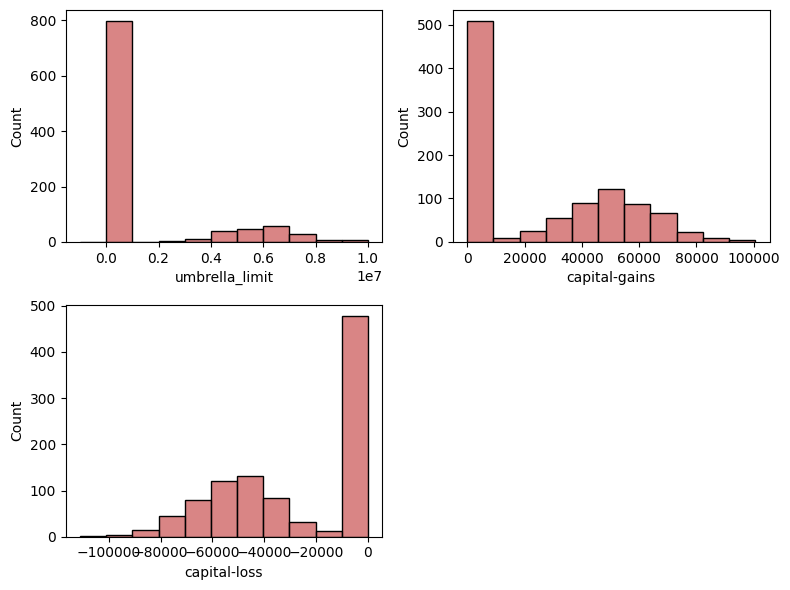

In [19]:
# Feature Transformation
# distribution of data before scaling
plt.figure(figsize=(8, 6))
for i, col in enumerate(['umbrella_limit','capital-gains', 'capital-loss']):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

What is Skewness ?

Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero

1. Umbrella limit  column is skewed
2. Apply a power transform featurewise to make data more Gaussian-like.
3. Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

In [20]:
# Check Skewness
X[continuous_features].skew(axis=0, skipna=True)

months_as_customer       0.362177
age                      0.478988
policy_annual_premium    0.004402
capital-gains            0.478850
capital-loss            -0.391472
total_claim_amount      -0.594582
injury_claim             0.264811
property_claim           0.378169
vehicle_claim           -0.621098
dtype: float64

In [21]:
# Check Skewness
X[discrete_features].skew(axis=0, skipna=True)

policy_deductable              0.477887
umbrella_limit                 1.806712
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
dtype: float64

In [22]:
# Apply Power Transformer to Check if it can reduces the outliers

In [23]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_features = ['umbrella_limit']
X_copy = pt.fit_transform(X[transform_features])

In [24]:
X_copy = pd.DataFrame(X_copy, columns=transform_features)

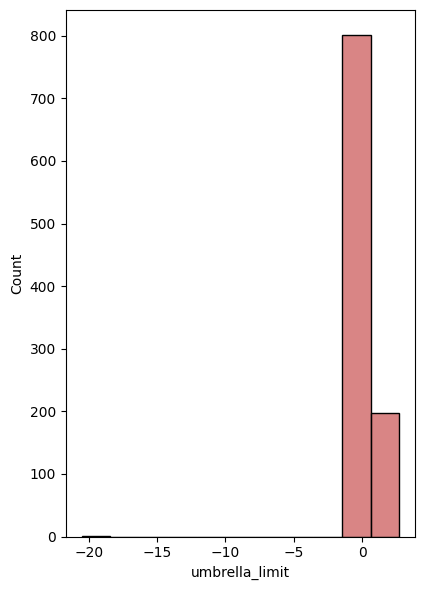

In [27]:
plt.figure(figsize=(8, 6))
for i, col in enumerate(transform_features):
    plt.subplot(1, 2, i+1)
    sns.histplot(x=X_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [28]:
X_copy.skew(axis=0, skipna=True)

umbrella_limit   -7.86593
dtype: float64

In [29]:
for feature in cat_features:
    print(feature,':', df[feature].nunique())

policy_csl : 3
insured_sex : 2
insured_education_level : 7
insured_occupation : 14
insured_relationship : 6
incident_type : 4
collision_type : 3
incident_severity : 4
authorities_contacted : 4
property_damage : 2
police_report_available : 2
fraud_reported : 2


Feature Encoding and Scaling

1. One Hot Encoding for Columns which had lesser unique values and not ordinal

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.
Ordinal Encoding for Columns which has many unique categories

2. Ordinal encoding is used here as label encoder is supported for column transformer.
Ordinal encoding is used for Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values.

3. Standard Scaler

Standardize features by removing the mean and scaling to unit variance.

In [30]:
num_features = list(X.select_dtypes(exclude="object").columns)

In [31]:
num_features

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim']

In [33]:
for feature in cat_features:
    print(feature,':', df[feature].unique())

policy_csl : ['250/500' '100/300' '500/1000']
insured_sex : ['MALE' 'FEMALE']
insured_education_level : ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
insured_occupation : ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
insured_relationship : ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
incident_type : ['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']
collision_type : ['Side Collision' 'Rear Collision' 'Front Collision']
incident_severity : ['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']
authorities_contacted : ['Police' 'Fire' 'Other' 'Ambulance']
property_damage : ['YES' 'NO']
police_report_available : ['YES' 'NO']
fraud_reported : ['Y' 'N']


In [34]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline


# Create Column Transformer with 3 types of transformers
or_columns = ['insured_education_level','policy_csl','incident_severity']
oh_columns = ['insured_sex','insured_occupation','insured_relationship','incident_type','collision_type','authorities_contacted','property_damage','police_report_available']

oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

ordinal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ordinalencoder", OrdinalEncoder()),
    ("scaler", MinMaxScaler())
])

onehot_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder())
])

numeric_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

# Combine the transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("Ordinal_Encoder", ordinal_pipeline, or_columns),
        ("OneHot_Encoder", onehot_pipeline, oh_columns),
        ("StandardScaler", numeric_pipeline, num_features)
    ]
)


In [35]:
X = preprocessor.fit_transform(X)

In [36]:
X

array([[ 0.66666667,  0.5       ,  0.        , ..., -0.18928317,
         1.16550497,  0.74965272],
       [ 0.66666667,  0.5       ,  0.33333333, ..., -1.36382194,
        -1.37269599, -1.82334593],
       [ 1.        ,  0.        ,  0.33333333, ...,  0.05464372,
        -0.73607206, -0.78556451],
       ...,
       [ 0.83333333,  0.5       ,  0.33333333, ...,  0.01364761,
         0.0208261 ,  0.77190224],
       [ 0.        ,  1.        ,  0.        , ..., -0.45370813,
        -0.45197603, -0.07357971],
       [ 0.        ,  0.5       ,  0.33333333, ..., -1.42941572,
        -1.34366428, -1.81434017]])

In [37]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

In [38]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 55), (200, 55))

In [39]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [40]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [41]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [42]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

In [43]:
base_model_report =evaluate_models(X=X_res, y=y_res, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8957
- F1 score: 0.9377
- Precision: 0.9014
- Recall: 0.9771
- Roc Auc Score: 0.7698


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9080
- F1 score: 0.9430
- Precision: 0.9394
- Recall: 0.9466
- Roc Auc Score: 0.8483


Gradient Boosting
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9141
- F1 score: 0.9470
- Precision: 0.9398
- Recall: 0.9542
- Roc Auc Score: 0.8521


Logistic Regression
Model performance for Training 

In [44]:
base_model_report

,Model Name,Accuracy
4,XGBClassifier,0.969325
5,CatBoosting Classifier,0.920245
7,AdaBoost Classifier,0.920245
2,Gradient Boosting,0.914110
1,Decision Tree,0.907975
3,Logistic Regression,0.901840
0,Random Forest,0.895706
6,Support Vector Classifier,0.895706


In [45]:
#Initialize few parameter for Hyperparamter tuning
xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

In [46]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("RF", RandomForestClassifier(), rf_params)
]

In [47]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
---------------- Best Params for XGBoost -------------------
{'min_child_weight': 1, 'max_depth': 7}
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 20}


In [48]:
model_param

{'XGBoost': {'min_child_weight': 1, 'max_depth': 7},
 'RF': {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 20}}

In [49]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1)
}
tuned_report =evaluate_models(X=X_res, y=y_res, models=best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9018
- F1 score: 0.9412
- Precision: 0.9078
- Recall: 0.9771
- Roc Auc Score: 0.7854


XGBClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9448
- F1 score: 0.9660
- Precision: 0.9552
- Recall: 0.9771
- Roc Auc Score: 0.8948




In [51]:
tuned_report

,Model Name,Accuracy
1,XGBClassifier,0.944785
0,Random Forest Classifier,0.901840


In [53]:
best_model = XGBClassifier(**model_param['XGBoost'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'KNN'
Accuracy Score value: 0.7400
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       145
           1       0.54      0.38      0.45        55

    accuracy                           0.74       200
   macro avg       0.66      0.63      0.64       200
weighted avg       0.72      0.74      0.72       200



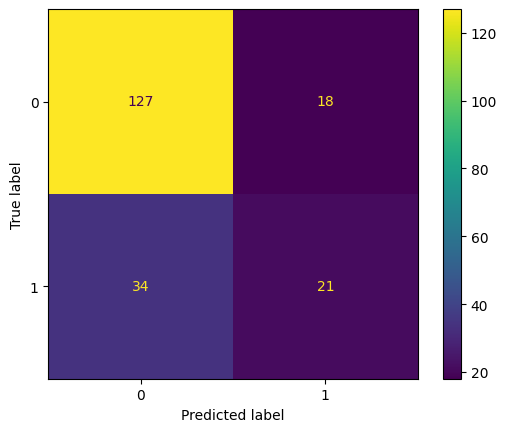

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)